# Суть проекта

    Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
    чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Задача, которую должен решать данный ноутбук

    Провести разведывательный анализ данных и составить отчет по его результатам. 

## Описание предоставленных для анализа данных

    Для анализа предоставлен файл stud_math.csv и информация с описанием полей в нем:
    1 school — аббревиатура школы, в которой учится ученик
    2 sex — пол ученика ('F' - женский, 'M' - мужской)
    3 age — возраст ученика (от 15 до 22)
    4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
    5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
    6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
    7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
     'at_home' - не работает, other' - другое)
    10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
     'at_home' - не работает, 'other' - другое)
    11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
     'course' - образовательная программа, 'other' - другое)
    12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
    13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
    14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
    15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
    16 schoolsup — дополнительная образовательная поддержка (yes или no)
    17 famsup — семейная образовательная поддержка (yes или no)
    18 paid — дополнительные платные занятия по математике (yes или no)
    19 activities — дополнительные внеучебные занятия (yes или no)
    20 nursery — посещал детский сад (yes или no)
    21 higher — хочет получить высшее образование (yes или no)
    22 internet — наличие интернета дома (yes или no)
    23 romantic — в романтических отношениях (yes или no)
    24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
    25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
    26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
    27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
    28 absences — количество пропущенных занятий
    29 score — баллы по госэкзамену по математике

### Загрузка используемых библиотек

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

## Функции, используемые для обработки данных  

In [50]:
def fill_by_moda(col):
    '''Заполняем значением моды значения NaN в заданном столбце'''
    school_data[col].fillna(school_data[col].mode().loc[0], inplace = True)
    
def border_emissions(num_col):
    '''Определяем границы выбросов в заданном числовом столбце'''
    IQR = school_data[num_col].quantile(0.75) - school_data[num_col].quantile(0.25)
    perc25 = school_data[num_col].quantile(0.25)
    perc75 = school_data[num_col].quantile(0.75)
 
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
def fill_emissions_repl(num_col, repl):
    '''Заменяем выбросы на переданное значение repl'''
    IQR = school_data[num_col].quantile(0.75) - school_data[num_col].quantile(0.25)
    perc25 = school_data[num_col].quantile(0.25)
    perc75 = school_data[num_col].quantile(0.75)
    low = perc25 - 1.5*IQR
    high = perc75 + 1.5*IQR
    school_data[num_col] = school_data[num_col].apply(lambda x: repl if ((x > high) or (x < low)) else x)
    
def get_boxplot(obj_col, y_ord):
    '''Отрисовываем boxplot для номинативного столбца obj_col, в качестве оси ординат используем y_ord'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = obj_col, y = y_ord,  data = school_data)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + obj_col)
    plt.show()
    
def get_stat_dif(column, criterion):
    '''Проверка столбца column на тест Стьюдента относительно criterion'''
    cols = school_data.loc[:, column].value_counts().index[:2]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(school_data.loc[school_data.loc[:, column] == comb[0], criterion], 
                        school_data.loc[school_data.loc[:, column] == comb[1], criterion]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для столбца', column)
            break   

In [51]:
school_data = pd.read_csv('stud_math.csv')
display(school_data)
school_data.info()
school_data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


# Первичная обработка данных

    Первичный просмотр информации о датасете говорит о том, что есть незаполненные ячейки (NaN) во многих столбцах. 
    Вместе с тем в датасете отсутствуют пропуски. Заполняем ячейки с NaN модой, наиболее часто встречающимся 
    в данном столбце значением. Далее проверяем получившийся результат на предмет незаполненных ячеек. Если результат 
    каждого столбца равен 395, то все ячейки столбцов в датасете заполнены и можно приступать к следующему этапу анализа. 

In [52]:
for col in school_data.columns:
    fill_by_moda(col)

In [53]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

# Анализ числовых переменных и устранение выбросов

    Отбираем числовые столбцы и анализируем их содержимое

In [54]:
num_clmn = school_data.select_dtypes(include = ['int64', 'float64']).columns
num_clmn

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

### столбец 'age'

    age — возраст ученика (от 15 до 22)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

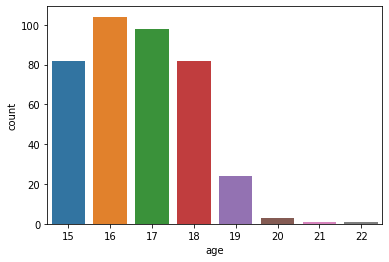

In [55]:
sns.countplot(x = 'age', data = school_data)
school_data['age'].value_counts()

### столбец 'Medu'

 Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)   

4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

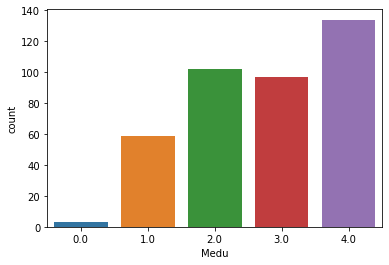

In [56]:
sns.countplot(x = 'Medu', data = school_data)
school_data['Medu'].value_counts()

### столбец 'Fedu'

Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [57]:
school_data['Fedu'].value_counts()

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

    Диапазон значений в этом стобце задан от 1 до 4, поэтому значение '40' - явная опечатка (выброс), которую преобразуем
    к '4' как к наиболее вероятному значению, после чего выводим уточненный список значений и строим график

2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

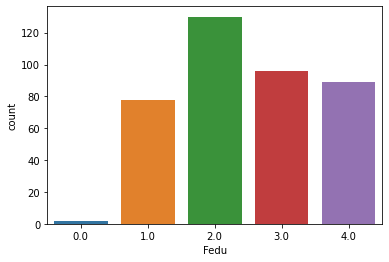

In [58]:
school_data.Fedu = school_data.Fedu.replace(40,4)
sns.countplot(x = 'Fedu', data = school_data)
school_data['Fedu'].value_counts()

### столбец 'traveltime'

    traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

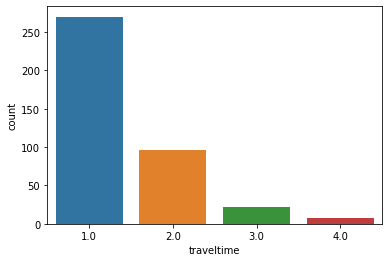

In [59]:
sns.countplot(x = 'traveltime', data = school_data)
school_data['traveltime'].value_counts()

### столбец 'studytime'

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

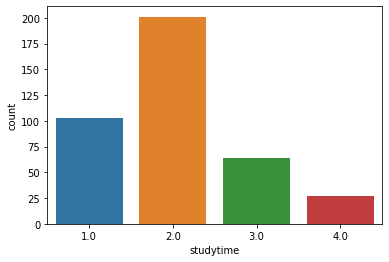

In [60]:
sns.countplot(x = 'studytime', data = school_data)
school_data['studytime'].value_counts()

### столбец 'failures'

failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

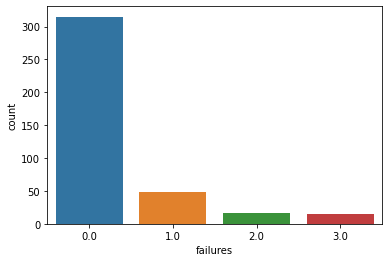

In [62]:
sns.countplot(x = 'failures', data = school_data)
school_data['failures'].value_counts()

### столбец 'studytime, granular'

    Этого столбца нет в предоставленном описании датасета, поэтому просто выводим значения в нем и строим график.
    Возможно, его роль будет прояснена далее

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

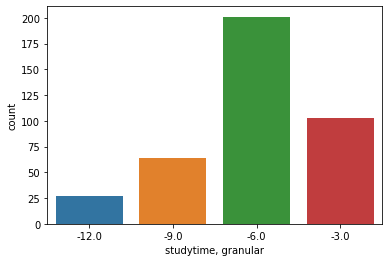

In [63]:
sns.countplot(x = 'studytime, granular', data = school_data)
school_data['studytime, granular'].value_counts()

### столбец 'famrel'

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [64]:
school_data['famrel'].value_counts()

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Диапазон значений столбца описан в задании к датасету от 1 до 5, поэтому '-1' - это явная опечатка (выброс), которую 
преобразуем к '1' как к наиболее близкому по смыслу значению, потом выводим обновленный список значений и строим график

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

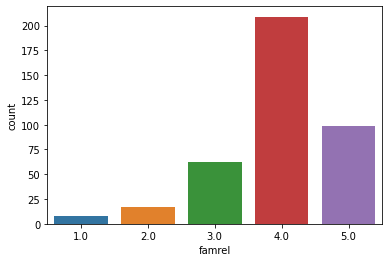

In [65]:
school_data.famrel = school_data.famrel.replace(-1,1)
sns.countplot(x = 'famrel', data = school_data)
school_data['famrel'].value_counts()

### столбец 'freetime'

    freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

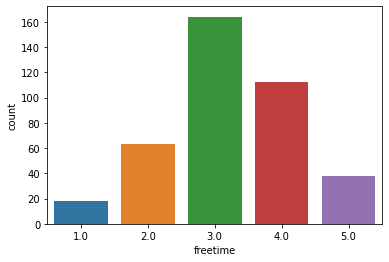

In [66]:
sns.countplot(x = 'freetime', data = school_data)
school_data['freetime'].value_counts()

### столбец 'goout'

    goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

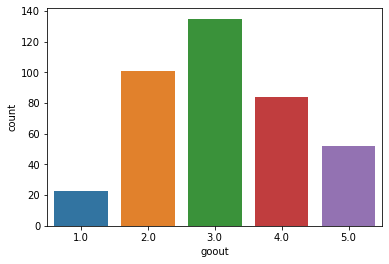

In [67]:
sns.countplot(x = 'goout', data = school_data)
school_data['goout'].value_counts()

### столбец 'health'

    health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

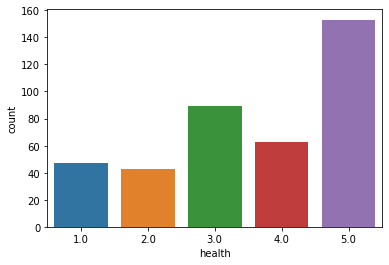

In [68]:
sns.countplot(x = 'health', data = school_data)
school_data['health'].value_counts()

### столбец 'absences'

    absences — количество пропущенных занятий

In [69]:
school_data['absences'].value_counts()

0.0      123
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

    Здесь присутствует очень большой разброс значений, явно присутствуют выбросы. Определяем границы выбросов 

In [70]:
border_emissions('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


    Для замены выбросов в данном столбце выбираю медиану. Выбор медианы аргументирую тем, что значение '0' в стобце
    означает нулевой результат на экзамене, а ненулевые значения ячеек, которые интерпретирую как выбросы, позволяют 
    предположить, что в них, пусть и с ошибкой, но пытались записать какой-то результат. Исходя из этого, считаю замену 
    выброса на медиану более правильным

In [71]:
median_em = school_data['absences'].median()
fill_emissions_repl('absences', median_em)

0.0     123
4.0      70
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

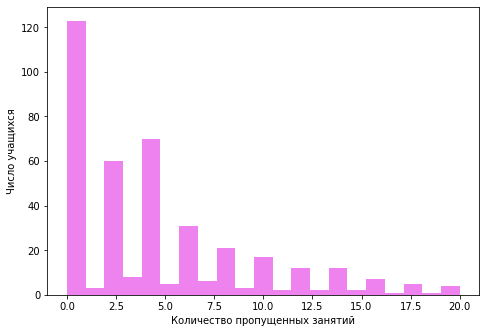

In [72]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(school_data['absences'], bins = 21, color = 'violet')
axes.set_ylabel('Число учащихся')
axes.set_xlabel('Количество пропущенных занятий')

school_data['absences'].value_counts()

### столбец 'score'

    score — баллы по госэкзамену по математик

50.0     60
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

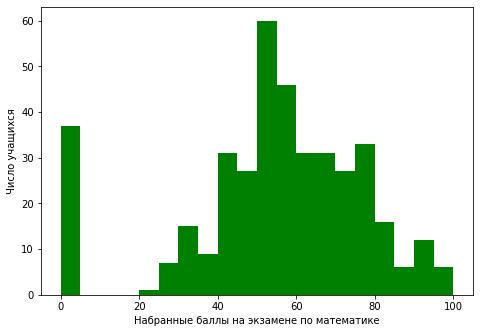

In [73]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(school_data['score'], bins = 20, color = 'green')
axes.set_ylabel('Число учащихся')
axes.set_xlabel('Набранные баллы на экзамене по математике')

school_data['score'].value_counts()

# Анализ номинативных переменных

    отбираем нечисловые столбцы для проверки легальности информации в них и выводим информацию series на экран 
    для анализа данных     

In [74]:
obj_clmns = school_data.select_dtypes(include = ['object']).columns
for obj_col in obj_clmns:
    info_obj_col = school_data[obj_col].value_counts()
    print(info_obj_col)

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    312
R     83
Name: address, dtype: int64
GT3    288
LE3    107
Name: famsize, dtype: int64
T    359
A     36
Name: Pstatus, dtype: int64
other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    281
father     86
other      28
Name: guardian, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64
yes    258
no     137
Name: famsup, dtype: int64
no     240
yes    155
Name: paid, dtype: int64
yes    209
no     186
Name: activities, dtype: int64
yes    316
no      79
Name: nursery, dtype: int64
yes    376
no      19
Name: higher, dtype: int64
yes    339
no      56
Name: internet, dtype: int64
no     271
yes    124
Name: romantic, 

    Анализ полученной информации о нечисловых столбцах позволяет утверждать, что там нет нет выбросов(опечаток), 
    все данные укладываются в указанные в условиях задачи параметры. Однако есть и очевидно бесполезные для дальнейшего 
    анализа данные: столбец nursery - посещал детский сад (yes или no). Данные этого столбца никак не могут влиять на шансы 
    молодых людей в возрасте 15 лет и старше сдать экзамен по математике. Поэтому исключаем этот столбец из дальнейшего 
    анализа, удаляя его из датасета и обновляем список номинативных столбцов.  

In [75]:
school_data.drop(['nursery'], inplace = True, axis = 1)
obj_clmns = school_data.select_dtypes(include = ['object']).columns
obj_clmns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'higher', 'internet', 'romantic'],
      dtype='object')

## Строим графики (боксплоты) для номинативных переменных

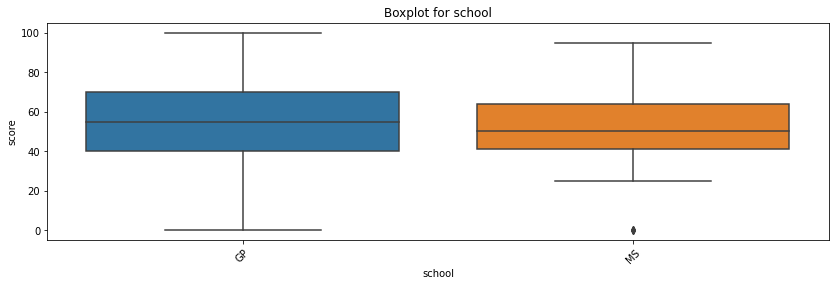

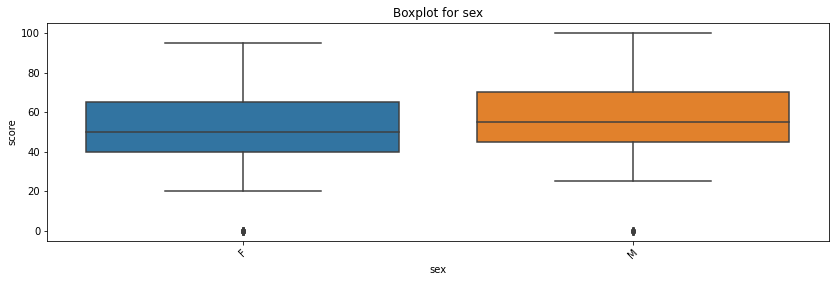

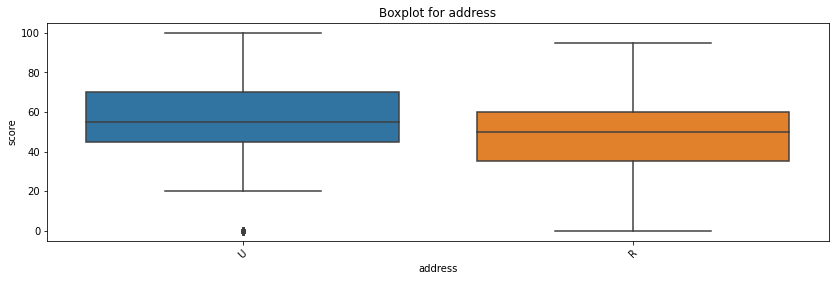

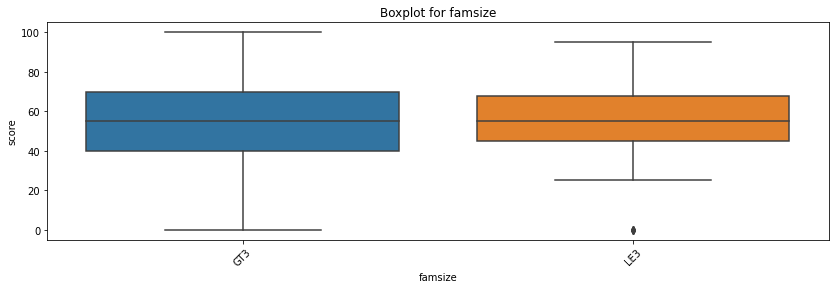

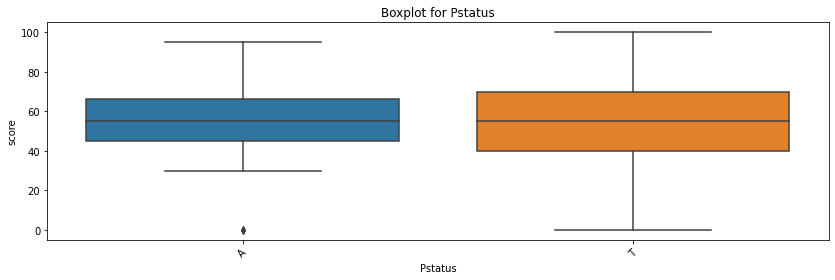

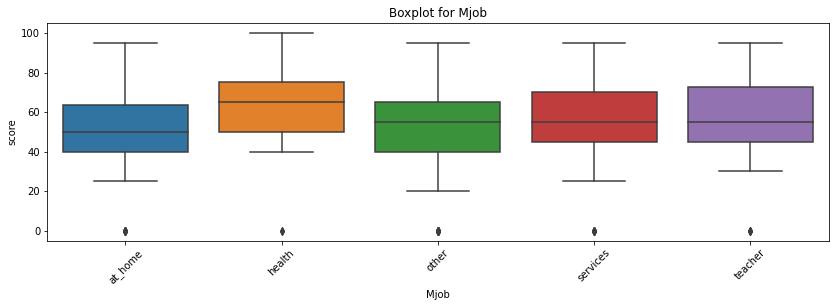

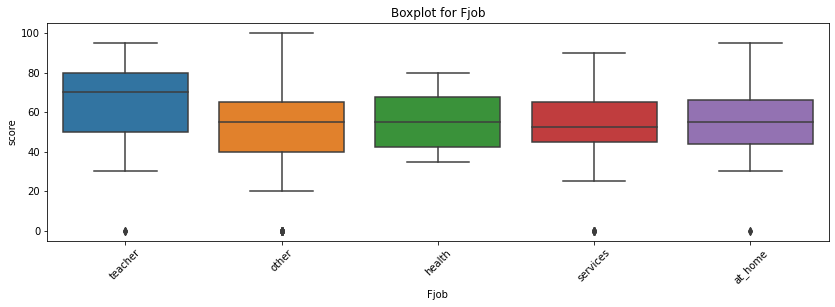

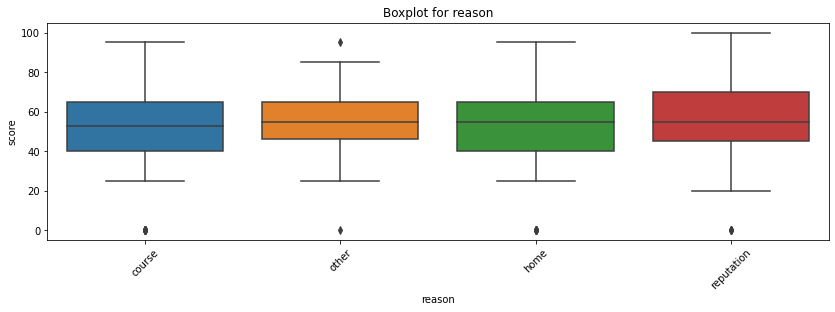

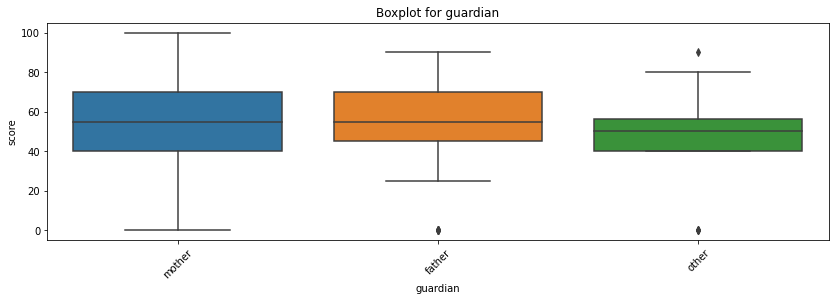

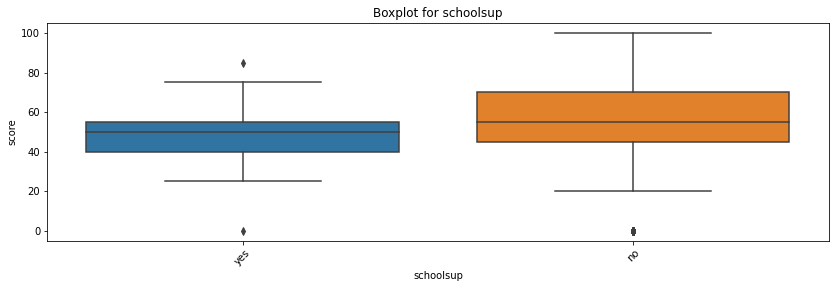

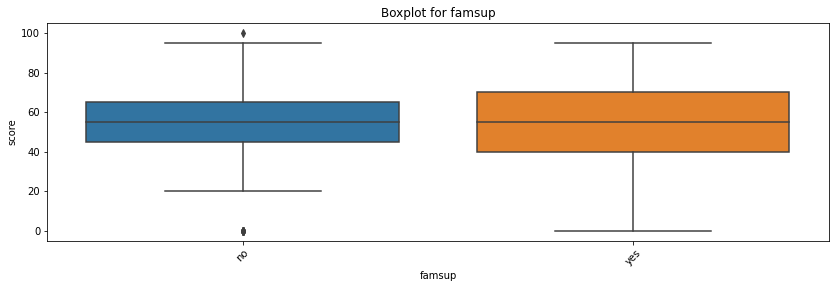

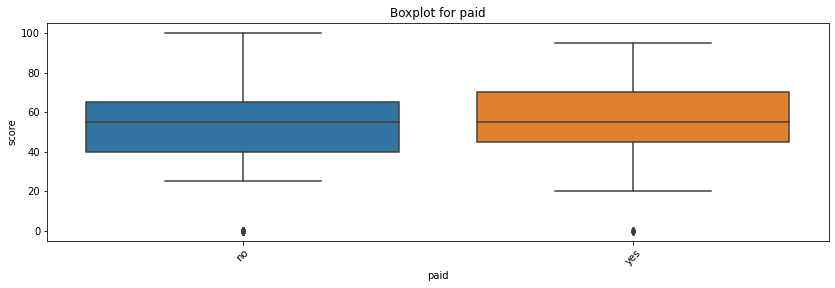

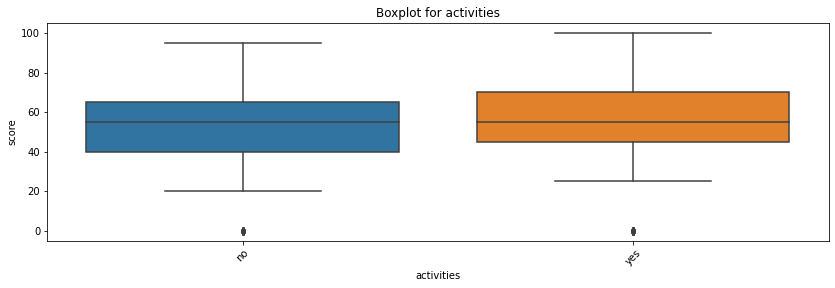

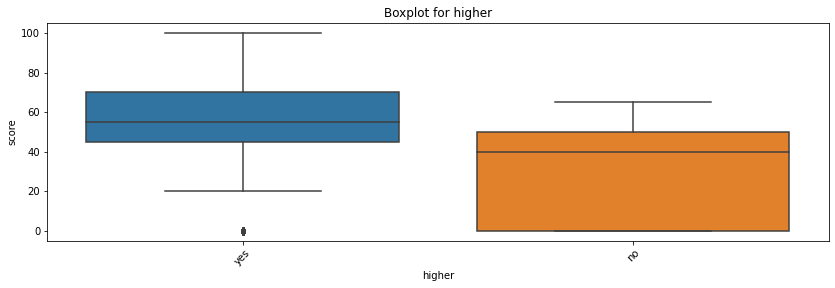

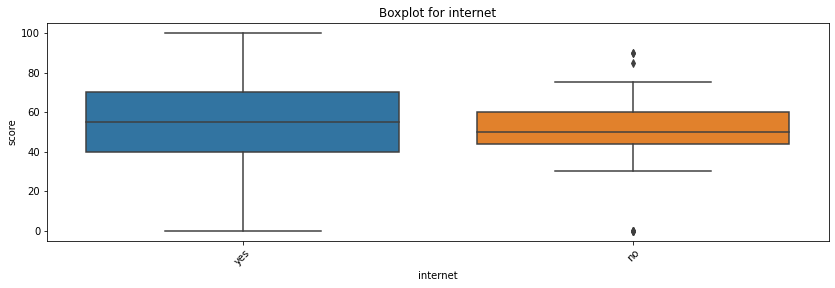

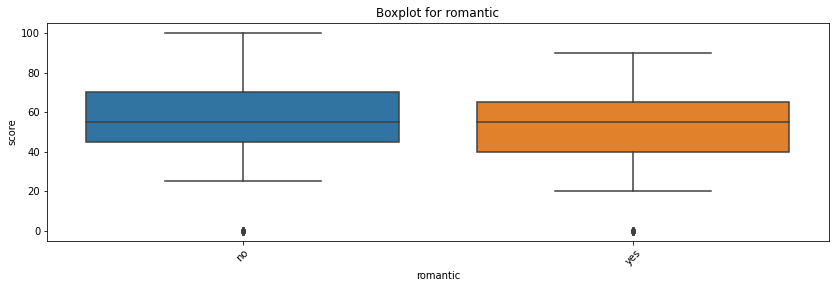

In [76]:
for obj_col in obj_clmns:
    get_boxplot(obj_col, 'score')

    Визуально можно отметить определенные различия в стобцах sex, address, Mjob, Fjob, higher, но полноту такого отбора и 
    значимость различий более точно определим позже с помощью теста Стьюдента.

# Корреляционный анализ числовых переменных

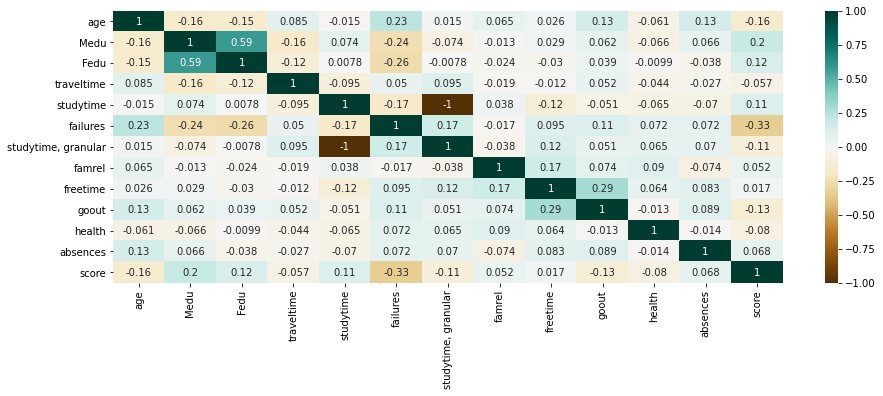

In [77]:
plt.figure(figsize=(15, 5))
sns.heatmap(school_data.corr(), cmap="BrBG", annot=True)
plt.show()

    Столбец 'studytime, granular' имеет полную отрицательную корреляцию со столбцом 'studytime', что доказывает 
    бесполезность информации в этом столбце для дальнейшего анализа, поэтому исключаем его из дальнейшего рассмотрения. 
    В принципе признаки показывают невысокую корреляцию со столбцом 'score'. Вероятно, частично это можно объяснить 
    молодостью основной массы учащихся, во многом оставшимся у них детским восприятием жизни, непониманием важности
    качества образования для дальнейшей карьеры и ввиду этого легкомысленного отношения к учебе. Впрочем, это может быть
    и иллюстрацией печального положения с образованием в данной стране, когда ценится только сам документ об образовании,
    а не его качество.

# Анализ номинативных переменных с помощью теста Стьюдента

    Проверим статистическую разницу в распределении оценок по номинативным признакам с помощью теста Стьюдента.

In [78]:
for obj_col in obj_clmns:
    get_stat_dif(obj_col, 'score')

Найдены статистически значимые различия для столбца sex
Найдены статистически значимые различия для столбца address
Найдены статистически значимые различия для столбца higher
Найдены статистически значимые различия для столбца romantic


 # Построение итоговой модели и выводы по итогам работы

Для построения итоговой модели отбираем количественные признаки, показавшие реультаты более 10% в корреляционном 
анализе и показавшие статистически значимые различия номинативные признаки

In [79]:
list_school_data = ['sex', 'address', 'higher', 'romantic', 'age', 'Medu', 'failures', 'studytime', 'goout', 'score']
school_data = school_data[list_school_data]
school_data

,sex,address,higher,romantic,age,Medu,failures,studytime,goout,score
0,F,U,yes,no,18,4.0,0.0,2.0,4.0,30.0
1,F,U,yes,no,17,1.0,0.0,2.0,3.0,30.0
2,F,U,yes,no,15,1.0,3.0,2.0,2.0,50.0
3,F,U,yes,yes,15,4.0,0.0,3.0,2.0,75.0
4,F,U,yes,no,16,3.0,0.0,2.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...
390,M,U,yes,no,20,2.0,2.0,2.0,4.0,45.0
391,M,U,yes,no,17,3.0,0.0,1.0,5.0,80.0
392,M,R,yes,no,21,1.0,3.0,1.0,3.0,35.0
393,M,R,yes,no,18,3.0,0.0,1.0,1.0,50.0


## Выводы:

1. В предоставленных данных мало пустых значений
2. Существенное количество выбросов найдено только в столбце 'absences', что позволяет утверждать о высокой чистоте
данных
3. Вместе с тем, объем предоставленных данных невелик (менее 400 строк), данные даны только по двум школам, 
причем данные по учащимся одной из них составляют почти 90% всех данных, что позволяет сомневаться в их высокой 
репрезентативности
4. Самые важные параметры, которые можно использовать в дальнейшем для построения модели, это sex, address, higher, 
romantic, age, Medu, failures, studytime, goout